In [2]:
import pandas as pd
import matplotlib.pyplot as plt
light_red = (255/255, 160/255, 160/255)  # RGB values scaled to range [0, 1]
light_green = (0/255, 176/255, 80/255)  # RGB values scaled to range [0, 1]

In [3]:
# Replace 'file.csv' with the path to your CSV file
dataset = "TWINSC"
# dataset = "IHDP"

file_path = f'output/data/{dataset}/7_all_data.csv'

# Read the CSV file into a DataFrame
dataframe = pd.read_csv(file_path)

# Display the DataFrame
print(dataframe)

       feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0            3.0        2.0        2.0        2.0        2.0        2.0   
1            3.0        2.0        2.0        2.0        2.0        8.0   
2            1.0        2.0        2.0        2.0        2.0        2.0   
3            4.0        2.0        2.0        2.0        2.0        8.0   
4            1.0        2.0        2.0        2.0        2.0        2.0   
...          ...        ...        ...        ...        ...        ...   
11395        1.0        2.0        2.0        2.0        2.0        2.0   
11396        2.0        2.0        2.0        2.0        2.0        8.0   
11397        3.0        2.0        2.0        2.0        2.0        2.0   
11398        1.0        2.0        2.0        2.0        2.0        2.0   
11399        7.0        2.0        2.0        2.0        2.0        2.0   

       feature_6  feature_7  feature_8  feature_9  ...  rank_pred  \
0            2.0        2.0   

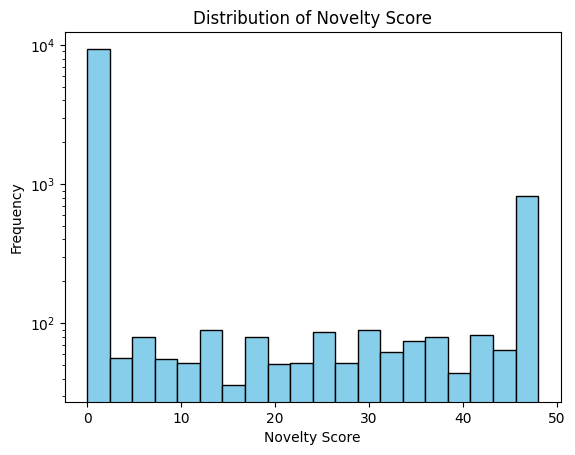

In [6]:
"""
This graph is shows the distributions of the novelty scores. 
This means that the x-axis shows all the possible values for a novelty score, 
while the y-axis shows the frequency of each value.
We conclude that the novelty scores are not uniformly, neither normally distributed.
"""

# Plot histogram of 'novelty score'
plt.hist(dataframe['Novelty Score'], bins=20, color='skyblue', edgecolor='black')

# Set y-axis scale to logarithmic
plt.yscale('log')

# Add labels and title
plt.xlabel('Novelty Score')
plt.ylabel('Frequency')
plt.title('Distribution of Novelty Score')

# Show plot
plt.show()

In [120]:
# Create deciles based on the 'ite' column
dataframe['decile_ite'] = pd.qcut(dataframe['ite'], q=10, labels=False)

# Create deciles based on the 'se' column
dataframe['decile_se'] = pd.qcut(dataframe['se'], q=10, labels=False)



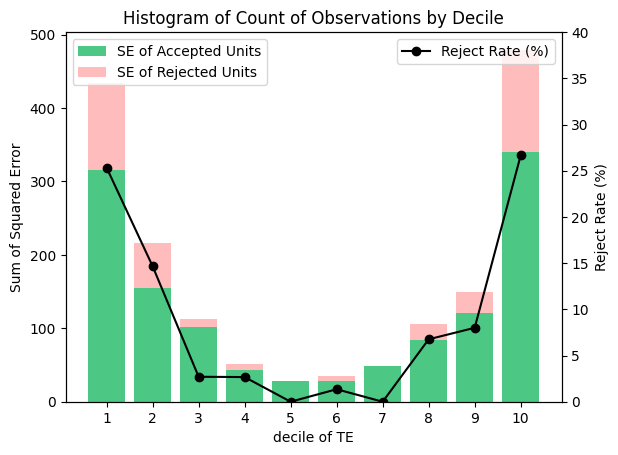

In [126]:
# Create the histogram

# Create a copy of the DataFrame to avoid modifying the original data
all_data = dataframe.copy()

# Create binary columns for rejected and not rejected
all_data['R'] = all_data['rejected'].apply(lambda x: 1 if x else 0)
all_data['T'] = 1  # Total count is always 1

# Calculate the counts of rejected and non-rejected instances for each decile_ite
rejected_counts = all_data.groupby('decile_ite')['R'].sum()
total_counts = all_data.groupby('decile_ite')['T'].sum()

# Calculate the sum of 'se' for instances where the 'rejected' column is True, grouped by decile_ite
rejected_se_sum = all_data[all_data['rejected']].groupby('decile_ite')['se'].sum()

# Calculate the sum of 'se' for instances where the 'rejected' column is False, grouped by decile_ite
non_rejected_se_sum = all_data[~all_data['rejected']].groupby('decile_ite')['se'].sum()

# Create a list of deciles
deciles = range(10)

# Pad rejected_se_sum and non_rejected_se_sum with zeros for missing deciles
rejected_se_sum = rejected_se_sum.reindex(deciles, fill_value=0)
non_rejected_se_sum = non_rejected_se_sum.reindex(deciles, fill_value=0)

# Plot histogram with two sets of bars for rejected and non-rejected instances
fig, ax1 = plt.subplots()

ax1.bar(range(10), non_rejected_se_sum, color=light_green, alpha=0.7, label='SE of Accepted Units')
ax1.bar(range(10), rejected_se_sum, bottom=non_rejected_se_sum, color=light_red, alpha=0.7, label='SE of Rejected Units')

# Add labels and title
ax1.set_xlabel('decile of TE')
ax1.set_ylabel('Sum of Squared Error')
ax1.set_title('Histogram of Count of Observations by Decile')

# Add legend
ax1.legend(loc='upper left')

# Add secondary y-axis for reject rates
ax2 = ax1.twinx()
reject_rates = dataframe.groupby('decile_ite')['rejected'].mean() * 100
ax2.plot(range(10), reject_rates, color='black', marker='o', linestyle='-', label='Reject Rate (%)')
ax2.set_ylabel('Reject Rate (%)')
ax2.set_ylim(0,40)

# # Add labels for the right y-axis
# for i, rate in enumerate(reject_rates):
#     ax2.text(i, rate, f'{rate:.0f}%', ha='center', va='bottom')

# Add labels for the right y-axis
ax2.set_ylabel('Reject Rate (%)')
ax2.legend(loc='upper right')

# Set x-axis ticks and labels for each decile_se
ax1.set_xticks(range(10))
ax1.set_xticklabels([f'{i+1}' for i in range(10)])

# Show plot
plt.show()

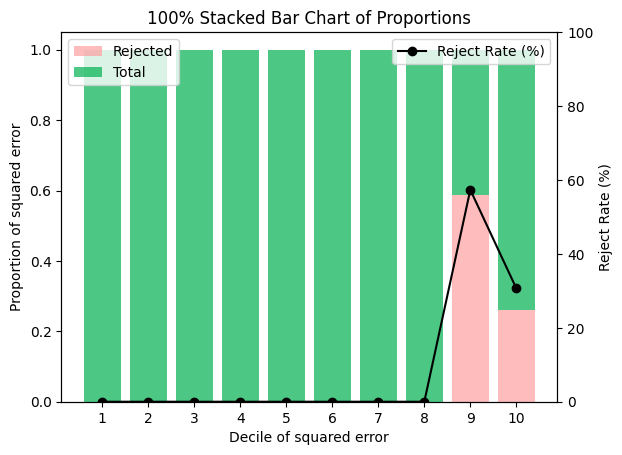

In [112]:

# Create binary columns for rejected and not rejected
all_data['R'] = all_data['rejected'].apply(lambda x: 1 if x else 0)
all_data['T'] = 1  # Total count is always 1

# Calculate the sum of 'se' for instances where the 'rejected' column is True, grouped by decile_se
rejected_se_sum = all_data[all_data['rejected']].groupby('decile_se')['se'].sum()

# Calculate the sum of 'se' for instances where the 'rejected' column is False, grouped by decile_se
non_rejected_se_sum = all_data[~all_data['rejected']].groupby('decile_se')['se'].sum()

# Combine rejected and non-rejected sums
total_se_sum = rejected_se_sum.add(non_rejected_se_sum, fill_value=0)

# Create a list of deciles
deciles = range(10)

# Pad rejected_se_sum and non_rejected_se_sum with zeros for missing deciles
rejected_se_sum = rejected_se_sum.reindex(deciles, fill_value=0)
non_rejected_se_sum = non_rejected_se_sum.reindex(deciles, fill_value=0)

# Calculate proportions for each group
rejected_proportions = rejected_se_sum.div(total_se_sum)
non_rejected_proportions = non_rejected_se_sum.div(total_se_sum)

# Plot 100% stacked bar chart
fig, ax1 = plt.subplots()

# Plot rejected bars on bottom if there are values for them
ax1.bar(range(10), rejected_proportions, color=light_red, alpha=0.7, label='Rejected')

# Plot non-rejected bars on top of rejected bars if there are values for them
ax1.bar(range(10), non_rejected_proportions, bottom=rejected_proportions, color=light_green, alpha=0.7, label='Total')

# Add labels and title
ax1.set_xlabel('Decile of squared error')
ax1.set_ylabel('Proportion of squared error')
ax1.set_title('100% Stacked Bar Chart of Proportions')

# Add secondary y-axis for reject rates
ax2 = ax1.twinx()
reject_rates = dataframe.groupby('decile_se')['rejected'].mean() * 100
ax2.plot(range(10), reject_rates, color='black', marker='o', linestyle='-', label='Reject Rate (%)')
ax2.set_ylabel('Reject Rate (%)')
ax2.set_ylim(0, 100)


# Add labels for the right y-axis
ax2.set_ylabel('Reject Rate (%)')
ax2.legend(loc='upper right')

# Add legend
ax1.legend(loc='upper left')

# Set x-axis ticks and labels for each decile_se
ax1.set_xticks(range(10))
ax1.set_xticklabels([f'{i+1}' for i in range(10)])

# Show plot
plt.show()


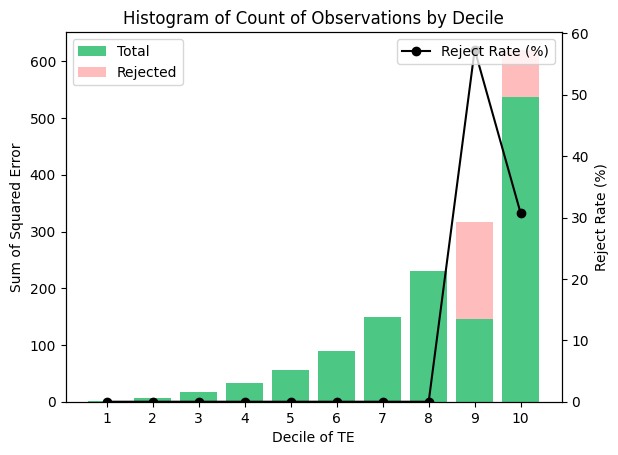

In [119]:
# Create a copy of the DataFrame to avoid modifying the original data
all_data = dataframe.copy()

# Create binary columns for rejected and not rejected
all_data['R'] = all_data['rejected'].apply(lambda x: 1 if x else 0)
all_data['T'] = 1  # Total count is always 1

# Calculate the counts of rejected and non-rejected instances for each decile_se
rejected_counts = all_data.groupby('decile_se')['R'].sum()
total_counts = all_data.groupby('decile_se')['T'].sum()

# Calculate the sum of 'se' for instances where the 'rejected' column is True, grouped by decile_se
rejected_se_sum = all_data[all_data['rejected']].groupby('decile_se')['ite'].sum()

# Calculate the sum of 'se' for instances where the 'rejected' column is False, grouped by decile_se
non_rejected_se_sum = all_data[~all_data['rejected']].groupby('decile_se')['se'].sum()

# Create a list of deciles
deciles = range(10)

# Pad rejected_se_sum and non_rejected_se_sum with zeros for missing deciles
rejected_se_sum = rejected_se_sum.reindex(deciles, fill_value=0)
non_rejected_se_sum = non_rejected_se_sum.reindex(deciles, fill_value=0)

# Plot histogram with two sets of bars for rejected and non-rejected instances
fig, ax1 = plt.subplots()

ax1.bar(range(10), non_rejected_se_sum, color=light_green, alpha=0.7, label='Total')
ax1.bar(range(10), rejected_se_sum, bottom=non_rejected_se_sum, color=light_red, alpha=0.7, label='Rejected')

# Add labels and title
ax1.set_xlabel('Decile of TE')
ax1.set_ylabel('Sum of Squared Error')
ax1.set_title('Histogram of Count of Observations by Decile')

# Add legend
ax1.legend(loc='upper left')

# Add secondary y-axis for reject rates
ax2 = ax1.twinx()
reject_rates = dataframe.groupby('decile_se')['rejected'].mean() * 100
ax2.plot(range(10), reject_rates, color='black', marker='o', linestyle='-', label='Reject Rate (%)')
ax2.set_ylabel('Reject Rate (%)')
ax2.set_ylim(0)

# # Add labels for the right y-axis
# for i, rate in enumerate(reject_rates):
#     ax2.text(i, rate, f'{rate:.0f}%', ha='center', va='bottom')

# Add labels for the right y-axis
ax2.set_ylabel('Reject Rate (%)')
ax2.legend(loc='upper right')

# Set x-axis ticks and labels for each decile_se
ax1.set_xticks(range(10))
ax1.set_xticklabels([f'{i+1}' for i in range(10)])

# Show plot
plt.show()

Effect
Adverse Effect    1833
Correct Effect    9208
Missed Effect      359
dtype: int64
Effect with reject
Adverse Effect    1726
Correct Effect    8864
Missed Effect      307
Rejected           503
dtype: int64
                Units in group before rejection  \
Adverse Effect                           1833.0   
Correct Effect                           9208.0   
Missed Effect                             359.0   
Rejected                                    0.0   

                Units in group after rejection  
Adverse Effect                            1726  
Correct Effect                            8864  
Missed Effect                              307  
Rejected                                   503  


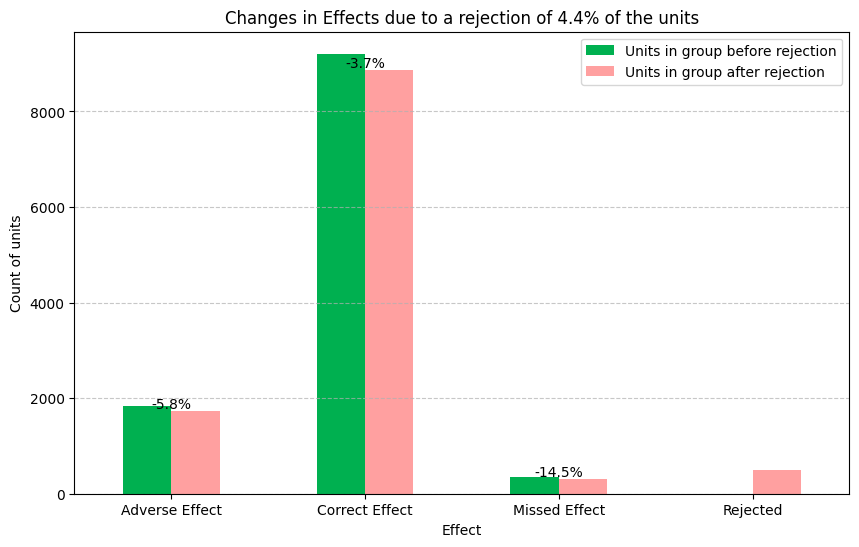

In [169]:
"""

T=1 if ITE_pred > 0
T=0 if ITE_pred <= 0

T should be 1 if ite > 0
T should be 0 if ite <= 0

"""

cost_df = dataframe.copy()

# Function to categorize the effect
def categorize_effect(row):
    ite = row['ite']
    ite_pred = row['ite_pred']

    if ite_pred > 0 and ite > 0:
        return 'Correct Effect'
    elif ite_pred <= 0 and ite <= 0:
        return 'Correct Effect'
    elif ite_pred > 0 and ite <= 0:
        return 'Adverse Effect'
    elif ite_pred <= 0 and ite > 0:
        return 'Missed Effect'

# Function to categorize the effect
def categorize_effect_with_reject(row):
    ite = row['ite']
    ite_pred = row['ite_reject']

    if ite_pred == 'R':
        return 'Rejected'
    elif float(ite_pred) > 0 and ite > 0:
        return 'Correct Effect'
    elif float(ite_pred) <= 0 and ite <= 0:
        return 'Correct Effect'
    elif float(ite_pred) > 0 and ite <= 0:
        return 'Adverse Effect'
    elif float(ite_pred) <= 0 and ite > 0:
        return 'Missed Effect'

# Apply the function to create the 'Effect' column
cost_df['Effect'] = cost_df.apply(categorize_effect, axis=1)

# Apply the function to create the 'Effect' column
cost_df['Effect with reject'] = cost_df.apply(categorize_effect_with_reject, axis=1)

# Create pivot table
pivot_table = pd.pivot_table(cost_df, index='Effect', aggfunc='size')
pivot_table_with_reject = pd.pivot_table(cost_df, index='Effect with reject', aggfunc='size')
print(pivot_table)
print(pivot_table_with_reject)

# Concatenate pivot tables along columns axis
combined_pivot = pd.concat([pivot_table, pivot_table_with_reject], axis=1)
# Replace NaN values with 0
combined_pivot.fillna(0, inplace=True)

# Rename columns for clarity
combined_pivot.columns = ['Units in group before rejection', 'Units in group after rejection']

print(combined_pivot)

# Calculate percentage difference
percentage_diff = ((combined_pivot.iloc[1, 0] - combined_pivot.iloc[0, 0]) / combined_pivot.iloc[0, 0]) * 100

# Define colors for the bars
colors = [light_green, light_red]  # Example colors
reject_rate = round(cost_df['rejected'][cost_df['rejected'] == True].count() / cost_df['rejected'].count()*100,1)

# Plot bar graph
combined_pivot.plot(kind='bar', figsize=(10, 6), color=colors)
plt.xlabel('Effect')
plt.ylabel('Count of units')
plt.title(f'Changes in Effects due to a rejection of {reject_rate:.1f}% of the units')
plt.xticks(rotation=0)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, (index, row) in enumerate(combined_pivot.iterrows()):
    if index != 'Rejected':  # Check if the x-label is not 'rejected'
        percentage_diff = ((row['Units in group after rejection'] - row['Units in group before rejection']) / row['Units in group before rejection']) * 100
        plt.text(i, row['Units in group after rejection'] + 0.5, f'{percentage_diff:.1f}%', ha='center', va='bottom')

plt.show()

In [26]:
# calculate the  correlation between dataframe['rejected'] and dataframe['feature_']

for dataset in  ["TWINSC", "IHDP"]:
    file_path = f'output/data/{dataset}/5_all_data.csv'

    # Read the CSV file into a DataFrame
    dataframe = pd.read_csv(file_path)


    correlations = {}

    # Loop through all columns starting with 'feature_'
    for column in dataframe.columns:
        if column.startswith('feature_'):
            correlation = dataframe['rejected'].corr(dataframe[column])
            correlations[column] = correlation

    # Print correlations
    print(dataset)
    for column, correlation in correlations.items():
        if abs(correlation) > 0.07:
            print(f"Correlation between 'rejected' and '{column}': {correlation}")

TWINSC
Correlation between 'rejected' and 'feature_22': -0.12205221991336024
IHDP
Correlation between 'rejected' and 'feature_8': 0.10556416775763215
Correlation between 'rejected' and 'feature_18': -0.08405105148872281
Correlation between 'rejected' and 'feature_22': 0.10921565315828442


In [25]:
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model
model = LinearRegression()

# Define the predictor variables (features)
X = dataframe.filter(regex='^feature_', axis=1)

# Define the target variable
y = dataframe['rejected']

# Fit the model
model.fit(X, y)

# Print the coefficients
print("Coefficients:")
for i, column in enumerate(X.columns):
    print(f"{column}: {model.coef_[i]}")

# Print the intercept
print("Intercept:", model.intercept_)


ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values